**Basil George** -
**2339366**

## Task 1

In [1]:
#import statements
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm

plt.ion()

In [2]:
#Auxiliary functions

#(17)
def P(x):
    return (math.log10(math.log10(8.122 * x[3] + 0.8)) - 10.04) / (-3.55)

#(16)
def T(x):
    return 2 * (10**P(x) - 560)

#(15)
def E(x):
    return 143.308 * T(x) * x[0]

#(18)
def h(x):
    return ((1500 * math.pi / 60)**2) * (2 * (10**-6) * math.pi * x[3] / E(x)) * (((x[2]**4) / 4) - ((x[1]**4) / 4))

#(14)
def P0(x):
    return (6 * (10**-6) * x[3] * x[0] * math.log(x[2] / x[1])) / (math.pi * h(x)**3)

#(13)
def W(x):
    return (math.pi * P0(x) / 2) * ((x[2]**2 - x[1]**2) / math.log(x[2] / x[1]))

In [3]:
#Counters for the functions

c_g1 = c_g2 = c_g3 = c_g4 = c_g5 = c_g6 = c_g7 = c_f = 0

In [4]:
#Constraint Functions

#(2)
def g1(x):
    global c_g1
    c_g1 += 1
    return 101000 - W(x)

#(3)
def g2(x):
    global c_g2
    c_g2 += 1
    return P0(x) - 1000

#(4)
def g3(x):
    global c_g3
    c_g3 += 1
    return T(x) - 50

#(5)
def g4(x):
    global c_g4
    c_g4 += 1
    return 0.001 - h(x)

#(6)
def g5(x):
    global c_g5
    c_g5 += 1
    return x[1] - x[2]

#(7)
def g6(x):
    global c_g6
    c_g6 += 1
    return ((0.0307 * x[0])/(772.8 * math.pi * P0(x) * h(x) * x[2])) - 0.001

#(8)
def g7(x):
    global c_g7
    c_g7 += 1
    return (W(x)/(math.pi * ((x[2]**2) - (x[1]**2)))) - 5000

In [5]:
#Objective Function

#(1)
def f(x):
    global c_f
    c_f += 1
    return (P0(x)*x[0]/0.7) + E(x)

## Validation code

In [109]:
##Validation code

x=np.array([4.19,11.57,6.69,10.65])

print("Objective Function output, f(x) = ", f(x))
print("Constraint Function output, g1(x) = ",g1(x))
print("Constraint Function output, g2(x) = ",g2(x))
print("Constraint Function output, g3(x) = ",g3(x))
print("Constraint Function output, g4(x) = ",g4(x))
print("Constraint Function output, g5(x) = ",g5(x))
print("Constraint Function output, g6(x) = ",g6(x))
print("Constraint Function output, g7(x) = ",g7(x))

Objective Function output, f(x) =  -1784.0773507231927
Constraint Function output, g1(x) =  101000.01528759542
Constraint Function output, g2(x) =  -1000.0000598304209
Constraint Function output, g3(x) =  -52.97118117373543
Constraint Function output, g4(x) =  -0.9196377239881502
Constraint Function output, g5(x) =  4.88
Constraint Function output, g6(x) =  -0.14477999681964235
Constraint Function output, g7(x) =  -4999.999945390436


## Task 2   -   Random Search

In [6]:
#Death penalty function

def phi_death(x, inf=99999):
    if g1(x) <= 0 and g2(x) <= 0 and g3(x) <= 0 and g4(x) <= 0 and g5(x) <= 0 and g6(x) <= 0 and g7(x) <= 0:
        return f(x)
    else:
        return inf

In [7]:
#Generating points to evaluate within the uniform distribution [lower_bound, upper_bound), here [1,16). Returns array of shape (10000, 4).

def get_x(max_iter, lower_bound, upper_bound):
        np.random.seed(22)
        points_to_evaluate = np.random.uniform(low=lower_bound,
                                         high=upper_bound,
                                         size=(max_iter, 4))
        return points_to_evaluate

In [8]:
#Generates results for the generated array and returns the lowerest values.

def random_search(function, max_iter, lower_bound, upper_bound):
    points_to_evaluate = get_x(max_iter, lower_bound, upper_bound)
    results = np.array([function(point) for point in points_to_evaluate])
    best_ind = np.argmin(results)
    return points_to_evaluate[best_ind], results[best_ind]

In [9]:

number_of_samples = 10000
lower_bound = 1
upper_bound = 16
rs_results = []


rs_results.append(random_search(phi_death, number_of_samples, lower_bound, upper_bound))

rs_results = np.array(rs_results, dtype=object)
print("The minimized decision vectors: \n x1 = ", rs_results[0,0][0], "\n x2 = ", rs_results[0,0][1], "\n x3 = ", rs_results[0,0][2], "\n x4 = ", rs_results[0,0][3])
print("The minimum power consumption found: ", rs_results[0,1])


The minimized decision vectors: 
 x1 =  8.704624673792722 
 x2 =  6.111162788767859 
 x3 =  6.782024210821531 
 x4 =  8.0220902182134
The minimum power consumption found:  32347.971006899174


In [10]:
print("Counters after RS: ", c_g1, ", ", c_g2, ", ", c_g3, ", ", c_g4, ", ", c_g5, ", ", c_g6, ", ", c_g7, ", ", c_f)

Counters:  10000 ,  2121 ,  228 ,  39 ,  15 ,  15 ,  15 ,  8


## Task 3   -   Simulated Annealing

In [11]:
#Static Penalty
r = 20
beta = 1
def s(x):
    return r * np.max([0, g1(x), g2(x), g3(x), g4(x), g5(x), g6(x), g7(x)])**beta

In [12]:
def phi_static(x):
    return f(x) + s(x)

In [13]:
# sampling from a Truncated Normal distribution
def tnorm_rvs(mean_vect, sigma_vect, lower, upper, size=1):
    a, b = (lower - mean_vect)/std_dev_vect, (upper - mean_vect)/std_dev_vect
    samples = np.zeros(shape=(size, len(mean_vect)))
    for i in range(len(mean_vect)):
        samples[:,i] = truncnorm.rvs(a[i], b[i], loc=mean_vect[i], scale=sigma_vect[i], size=size)
    return samples

In [14]:
# initial values
mean_vect = np.array([7.5, 7.5, 7.5, 7.5])
std_dev_vect = np.array([5, 5, 5, 5])
lower = np.array([1, 1, 1, 1])
upper = np.array([16, 16, 16, 16])

X = tnorm_rvs(mean_vect, std_dev_vect, lower, upper)
X = X.flatten()

In [15]:
'''
Generates values in truncated normal distribution around the current points and evaluates the objective function.
If result is better than the existing best result then update the values. (Exploitative move)
Else accept it as the current solution if the probability function allows it. (Explorative move)
Here we are using the negative exponent e^(-x) as the probability function
'''

def simulated_annealing(function, initial_solution, num_iterations , initial_temperature = 10000000):
    x_c = initial_solution
    y_c = function(x_c)

    x_best = x_c
    y_best = y_c
    tk = initial_temperature
    np.random.seed(1)

    for i in range(1, num_iterations):

        # Generate a random solution in the Normal distribution
        x_i = tnorm_rvs(x_c, std_dev_vect, lower, upper)
        x_i = x_i.flatten()

        # Evaluate the objective function
        y_i = function(x_i)
        delta_y = y_i - y_c

        # Accept the solution if it's better or if the probability functoin allows it
        if delta_y < 0 or np.random.rand() < np.exp(-delta_y / tk):
            x_c = x_i
            y_c = y_i

        # Update the best solution if needed
        if y_c < y_best:
            x_best = x_c
            y_best = y_c

        # Reduce the temperature to control the probability function
        tk = initial_temperature / i

    return x_best, y_best

In [16]:
sa_results = []

sa_results.append(simulated_annealing(phi_static, X, 10000))

sa_results = np.array(sa_results, dtype=object)
print("The minimized decision vectors: \n x1 = ", sa_results[0,0][0], "\n x2 = ", sa_results[0,0][1], "\n x3 = ", sa_results[0,0][2], "\n x4 = ", sa_results[0,0][3])
print("\nThe minimum power consumption found: ", sa_results[0,1])


The minimized decision vectors: 
 x1 =  4.309013278672585 
 x2 =  7.16895661145008 
 x3 =  7.101691295249543 
 x4 =  8.540680171974419

The minimum power consumption found:  11877.18402065046


In [17]:
print("Counters after RS and SA: ", c_g1, ", ", c_g2, ", ", c_g3, ", ", c_g4, ", ", c_g5, ", ", c_g6, ", ", c_g7, ", ", c_f)

Counters after RS and SA:  20000 ,  12121 ,  10228 ,  10039 ,  10015 ,  10015 ,  10015 ,  10008


## Task 4    -    Comparing the Algorithms

In [181]:
## Running Random Search 21 times
rs_21 = []

for i in range(21):
    #Run after removing np.random.seed()
    x = get_x(number_of_samples, lower_bound, upper_bound)
    rs_21.append(random_search(phi_death, number_of_samples, lower_bound, upper_bound))

rs_21 = np.array(rs_21, dtype=object)


In [183]:
## Running Simulated Annealing 21 times
sa_21 = []

for i in range(21):
    #Run after removing np.random.seed()
    sa_21.append(simulated_annealing(phi_static, X, 10000))

sa_21 = np.array(sa_21, dtype=object)

Text(0, 0.5, 'Best Objective Value')

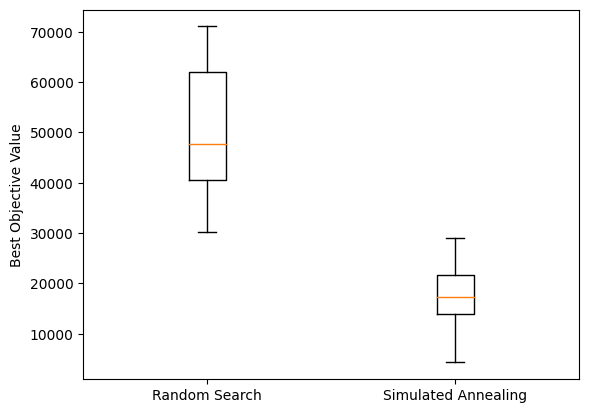

In [185]:
plt.boxplot([rs_21[:,1], sa_21[:,1]])
plt.xticks([1,2], ['Random Search','Simulated Annealing'])
plt.ylabel("Best Objective Value")

In [184]:
print("Lowest Objective value by Random search : ",np.min(rs_21[:,1]))
print("Lowest Objective value by Simulated Annealing : ",np.min(sa_21[:,1]))

Lowest Objective value by Random search :  30143.64049589973
Lowest Objective value by Simulated Annealing :  4279.885996771713


In [196]:
from scipy.stats import mannwhitneyu


v1 = []
for i in rs_21[:,1]:
    v1.append(int(i))

v2 = []
for i in sa_21[:,1]:
    v2.append(int(i))

statistic, p_value = mannwhitneyu(v1, v2, alternative="greater")

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 441.0
P-value: 1.562699999200436e-08


The null hypothesis states that the distribution are equivalent. With a very low p-value, for an alpha of 0.05 we can reject the null hypothesis. The low p-value suggests that v1 is considerably greater than v2. Since we are trying to minimize, this is not the desired outcome. Here, v1 was generated using Random Search and v2 was generated using Simulated Annealing.

Hence we can conclude that Simulated Annealing is the better algorithm.